# TRABALHO COMPUTACIONAL 1 - OTIMIZAÇÃO NÃO-LINEAR

## Alunos:

Lucas Samuel Fernandes Andrade Oliveira 2021019548

Maria Clara Oliveira Domingos Ruas 2021019572


# QUESTÃO 1

Método utilizado: BFGS
Critério de parada: Optimization terminated successfully.
Número de iterações: 4
Número de avaliações da função objetivo: 20
Resultado final:
[0.60837423 1.09624042 1.36697757]


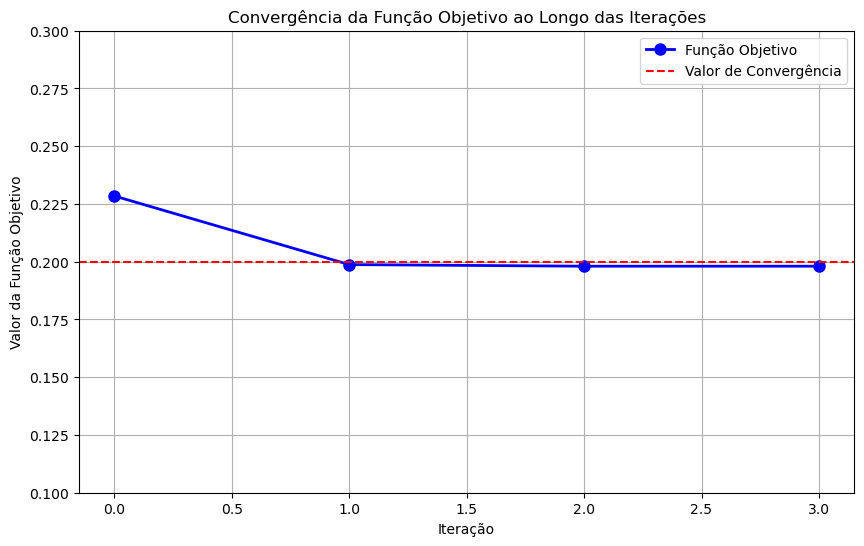

In [67]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

# Função objetivo
def fx(x):
    x1, x2, x3 = x[0], x[1], x[2]
    return (2*x1**2 + 2*x2**2 - 2*x1*x2 + x3**2 - 2*x2*x3)/(x1**2 + x2**2 + x3**2)

# Restrição de igualdade
def constraint(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 1

# Ponto inicial
x0 = [1, 1, 1]

# Função para coletar os valores da função objetivo ao longo das iterações
def collect_values(x):
    values.append(fx(x))

# Lista para armazenar os valores da função objetivo ao longo das iterações
values = []

# Chamada à função de minimização com a função de callback
result = minimize(fx, x0, method='BFGS', constraints={'type': 'eq', 'fun': constraint}, callback=collect_values)

# Calcular os valores da frequência natural ao longo das iterações
freq_values = np.sqrt(np.array(values))

# Imprimir resultados
print("Método utilizado: BFGS")
print("Critério de parada: {}".format(result.message))
print("Número de iterações: {}".format(result.nit))
print("Número de avaliações da função objetivo: {}".format(result.nfev))
print("Resultado final:")
print(result.x)

# Ajuste da escala do eixo y
target_value = 0.2
y_min = min(min(values), target_value - 0.1)
y_max = max(max(values), target_value + 0.1)

# Gerar gráfico de convergência
plt.figure(figsize=(10, 6))  # Ajustar o tamanho do gráfico

plt.plot(values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Função Objetivo')
plt.axhline(y=target_value, color='red', linestyle='--', label='Valor de Convergência')  # Adicionar linha vermelha horizontal
plt.title('Convergência da Função Objetivo ao Longo das Iterações')
plt.xlabel('Iteração')
plt.ylabel('Valor da Função Objetivo')

# Ajustar a escala do eixo y
plt.ylim(y_min, y_max)

plt.legend()
plt.grid(True)
plt.show()


# QUESTÃO 2

**Letra A: Curvas de Nível**


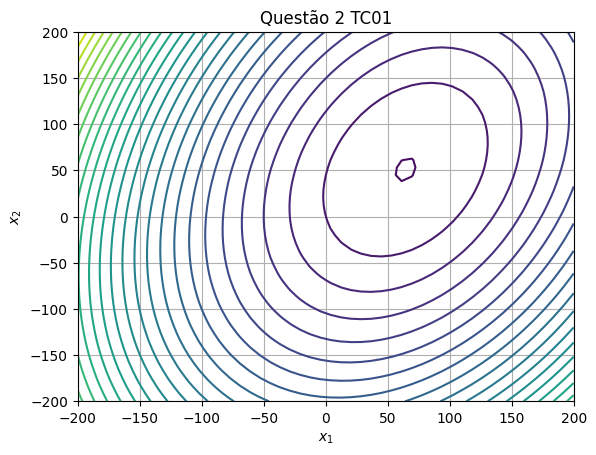

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 0.6382*x1**2 + 0.3191*x2**2 - 0.2809*x1*x2 - 67.906*x1 - 14.29*x2

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-200, 200),
                     np.linspace(-200, 200))

# Avalia função para plotar contorno
f = 0.6382*x1**2 + 0.3191*x2**2 - 0.2809*x1*x2 - 67.906*x1 - 14.29*x2

# Plota contorno
plt.contour(x1, x2, f, levels=30)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 2 A TC01')
plt.grid()
plt.show()


**Letra B: Resolução do Problema**

Supondo o problema de otimização:
\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}} f(\mathbf{x}) = &~0.6382x_1^2 + 0.3191x_2^2 - 0.2809x_1x_2 - 67.906x_1 - 14.29x_2 \\
    & \mathbf{x}\in\mathbb{R}^2 &
\end{align}

Para essa função objetivo, a expressão analítica do vetor gradiente é:
\begin{equation}
    \nabla f(\mathbf{x}) = \begin{bmatrix} 1.2764x_1 - 0.2809x_2 - 67.906 \\ 0.6382x_2 - 0.2809x_1 - 14.29 \end{bmatrix}
\end{equation}

Além disso, a matrix hessiana também pode ser expressa analiticamente como:
\begin{equation}
    H(\mathbf{x}) = \begin{bmatrix} 1.2764 & -0.2809 \\ -0.2809 & 0.6382 \end{bmatrix}
\end{equation}

Vamos pressupor que o ponto inicial para o nosso algoritmo de otimização seja $\mathbf{x_0} = \begin{bmatrix} 150 \\  150 \end{bmatrix}$.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv
from otimo import SecaoAurea, Gradiente, Newton,  Bissecao, gradiente
import otimo

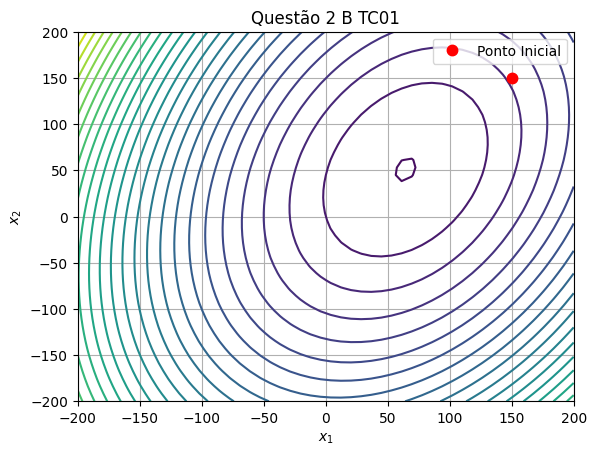

In [8]:
# Ponto inicial
x0 = np.zeros(2) 
x0[0] = 150
x0[1] = 150

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 0.6382*x1**2 + 0.3191*x2**2 - 0.2809*x1*x2 - 67.906*x1 - 14.29*x2

# Definição do vetor gradiente
def gradiente(x):
    x1, x2 = x[0], x[1]
    g = np.zeros((2, 1))
    g[0] = 1.2764*x1 - 0.2809*x2 - 67.906
    g[1] = 0.6382*x2 - 0.2809*x1 - 14.29
    return g
    
# Definição da matriz hessiana
def hessiana(x):
    H = np.zeros((2, 2))
    H[0, 0] = 1.2764
    H[0, 1] = -0.2809
    H[1, 0] = -0.2809
    H[1, 1] = 0.6382
    return H

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-200, 200),
                     np.linspace(-200, 200))

# Avalia função para plotar contorno
f = 0.6382*x1**2 + 0.3191*x2**2 - 0.2809*x1*x2 - 67.906*x1 - 14.29*x2

# Plota trajetória
plt.contour(x1, x2, f, levels=30)
plt.plot(x0[0], x0[1], '.r', label='Ponto Inicial', markersize=15)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 2 B TC01')
plt.legend()
plt.grid()
plt.show()

**Aplicando o Método do Gradiente**

Solução ótima: [64.36302588 50.72096704]
Número de iterações: 16
Número de avaliações: 417


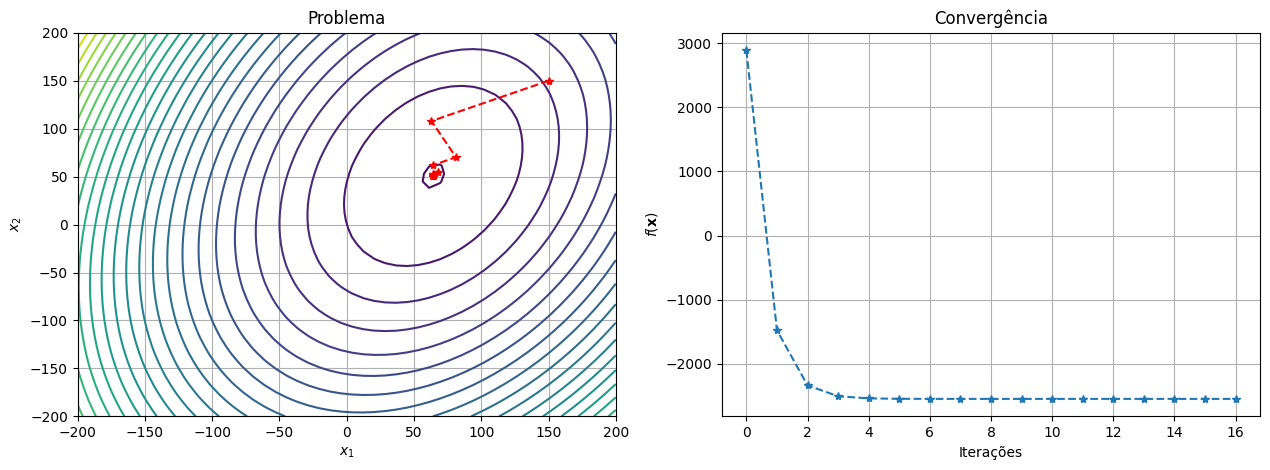

In [9]:
solucao = Gradiente(SecaoAurea(precisao=1e-2, passo=1e-3), maxit=30,
                    maxaval=5000).resolva(fx, x0)

print(solucao)
solucao.resultados(fx, [-200., 200.], [-200., 200.])

**Aplicando o Método de Newton**


Solução ótima:  [64.36329702 50.72022898]


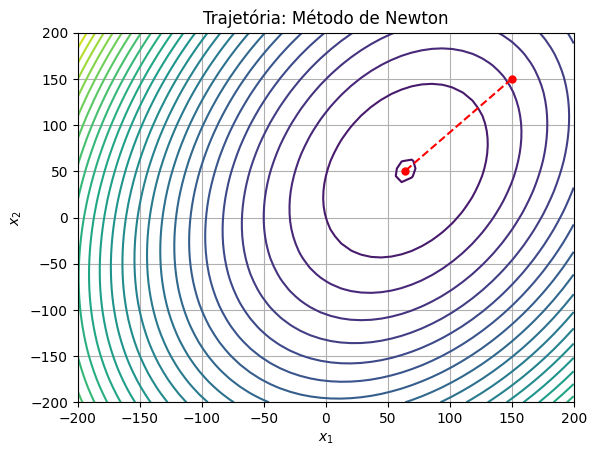

In [10]:
# Calcula o gradiente
g = gradiente(x0)

# Calcula a hessiana
H = hessiana(x0)

# Redefine o ponto x0 no formato (2x1) apenas para questões de
# multiplicação de matrizes no Python
x0 = x0.reshape((2, 1))

# Método de Newton
xopt = x0 - inv(H)@g

# Informa a solução ótima
print("Solução ótima: ", str(xopt.reshape(2)))

# Exibe a trajetória
plt.contour(x1, x2, f, levels=30)
plt.plot([x0[0], xopt[0]], [x0[1], xopt[1]], '--.r', markersize=10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Trajetória: Método de Newton')
plt.grid()
plt.show()

# Questão 3


**Letra A: Curvas de Nível**

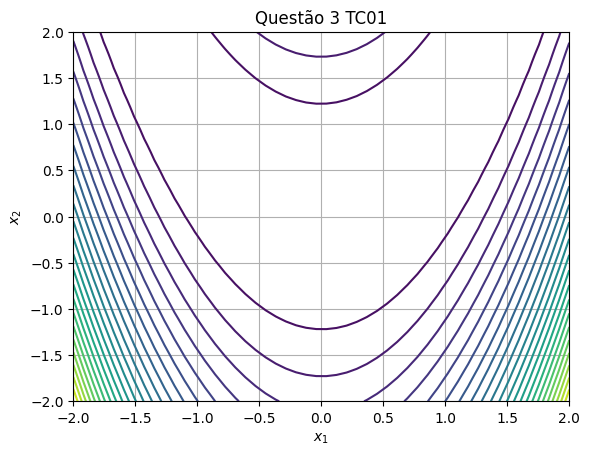

In [18]:
x0 = np.zeros((2, 1))
x0[0] = -1
x0[1] = 1.5

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 100*(x2 - x1**2)**2 + (1 - x1)**2

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Avalia função para plotar contorno
f = 100*(x2 - x1**2)**2 + (1 - x1)**2

# Plota contorno
plt.contour(x1, x2, f, levels=30)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 3 TC01')
plt.grid()
plt.show()

**Letra B: Comparação de Métodos**

***Método do Gradiente***

Solução ótima: [0.99894084 0.99788403]
Número de iterações: 3082
Número de avaliações: 25847


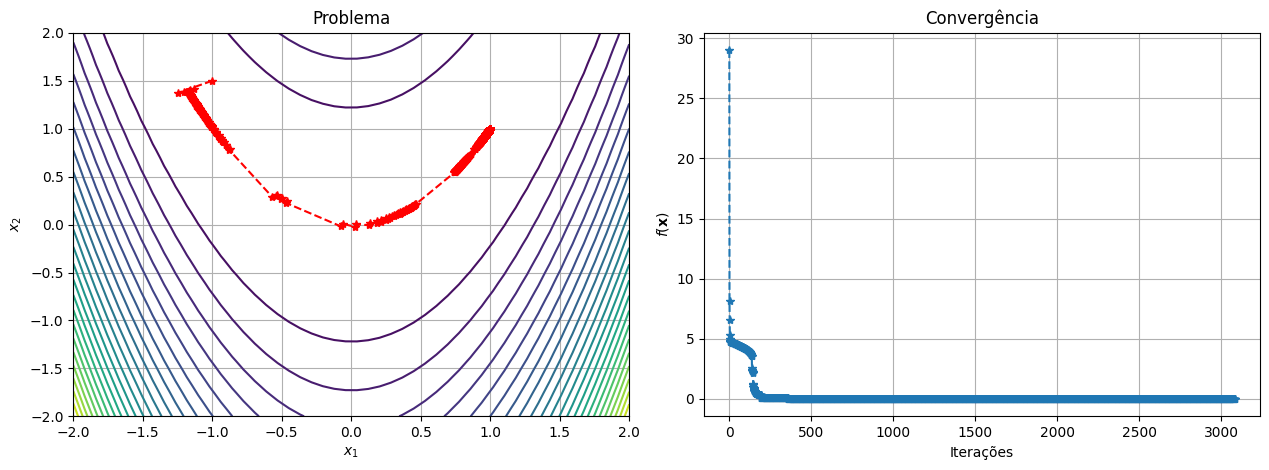

In [21]:
# Ponto inicial
x0 = np.zeros(2) 
x0[0] = -1
x0[1] = 1.5

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 100*(x2 - x1**2)**2 + (1 - x1)**2
solucao = Gradiente(Bissecao(precisao=1e-2, passo=1e-3), maxit=4000,
                    maxaval=30000).resolva(fx, x0)

print(solucao)
solucao.resultados(fx, [-2., 2.], [-2., 2.])

***Método BFGS***

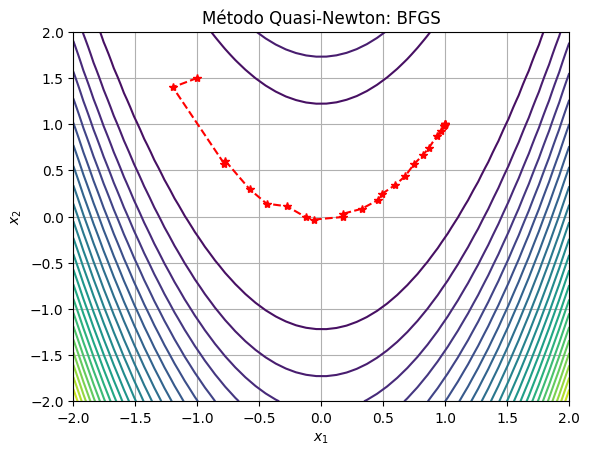

Número de avaliações: 773
Número de iterações: 25
[[0.99999998]
 [0.99999995]]


In [19]:
x = x0.copy()
feval = fx(x)
xlist = [x0.copy()]
navaliacoes = 1
nit = 0

# Aproximação inicial da inversa da matriz hessiana
Hh = np.eye(x.size)

# Primeira estimativa do gradiente
g, nava = gradiente(x, fx, feval)
navaliacoes += nava

for it in range(25):
    
    nit += 1
    # Determina a direção de busca
    d = - Hh @ g
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Grava informações antes do passo
    xanterior = x.copy()
    ganterior = g.copy()
    
    # Dá o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    navaliacoes += 1
    
    # Estima novo gradiente
    g, nava = gradiente(x, fx, feval) 
    navaliacoes += nava
    
    xlist.append(x.copy())

    # Atualiza vetores v e r
    v = xanterior-x
    r = ganterior-g
    
    # Coloca na forma vetor-coluna
    v = v.reshape((-1, 1))
    r = r.reshape((-1, 1))

    # Atualização de Hh
    Hh = Hh + (1 + r.T@Hh@r/(r.T@v))*v@v.T/(v.T@r)  - (v@r.T@Hh + Hh@r@v.T)/(r.T@v)
    
    # Verifica autovalores
    autovalores, _ = np.linalg.eig(Hh)
    if np.any(autovalores < 0.):
        print('Correção de H')
        Hh = np.eye(x.size)

# Plota trajetória
xlist = np.array(xlist)
plt.contour(x1, x2, f, levels=30)
plt.plot(xlist[:, 0], xlist[:, 1], '--*r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Método Quasi-Newton: BFGS')
plt.grid()
plt.show()
print('Número de avaliações: %d' % navaliacoes)
print('Número de iterações: %d' % nit)
print(x)

# Questão 4
**Letra A: Curvas de Nível**

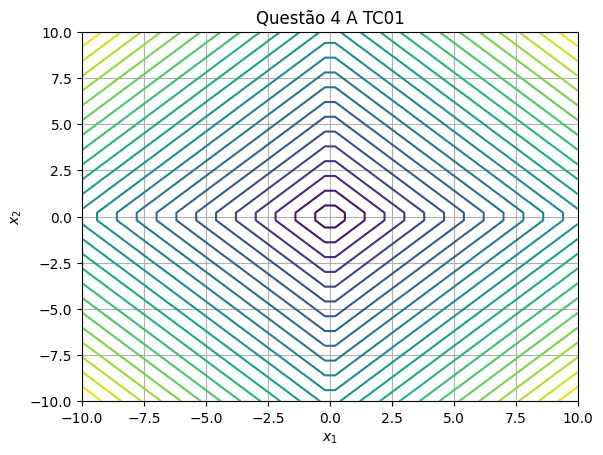

In [3]:
# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return abs(x1) + abs(x2)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-10, 10),
                     np.linspace(-10, 10))

# Avalia função para plotar contorno
f = abs(x1) + abs(x2)

# Plota trajetória
plt.contour(x1, x2, f, levels=30)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 4 A TC01')
plt.grid()
plt.show()

**Letra B: Resolução Ponto Inicial (200, 0)**

***Método do Gradiente***


Solução ótima: [1.95001371e+02 7.49906803e-04]
Número de iterações: 4000
Número de avaliações: 28000


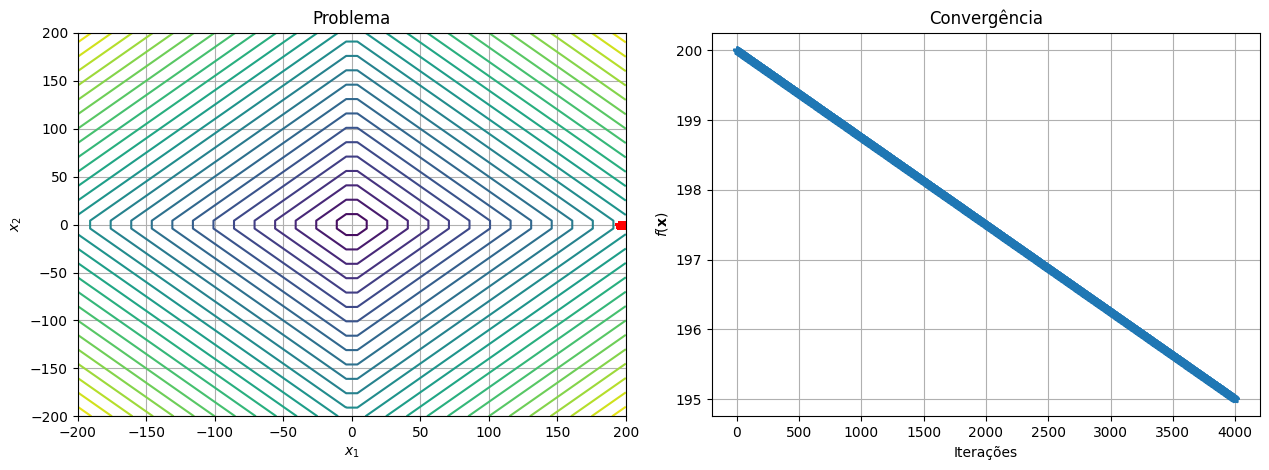

In [4]:
# Ponto inicial
x0 = np.zeros(2) 
x0[0] = 200
x0[1] = 0

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return abs(x1) + abs(x2)
solucao = Gradiente(Bissecao(precisao=1e-2, passo=1e-3), maxit=4000,
                    maxaval=30000).resolva(fx, x0)

print(solucao)
solucao.resultados(fx, [-200., 200.], [-200., 200.])

***Método não diferenciável: Simplex***

Optimization terminated successfully.
         Current function value: 0.000958
         Iterations: 43
         Function evaluations: 77
Método utilizado: Nelder-Mead Simplex
Número de iterações: 43
Número de avaliações da função objetivo: 77
Resultado final:
[-6.33859599e-06  9.51962074e-04]


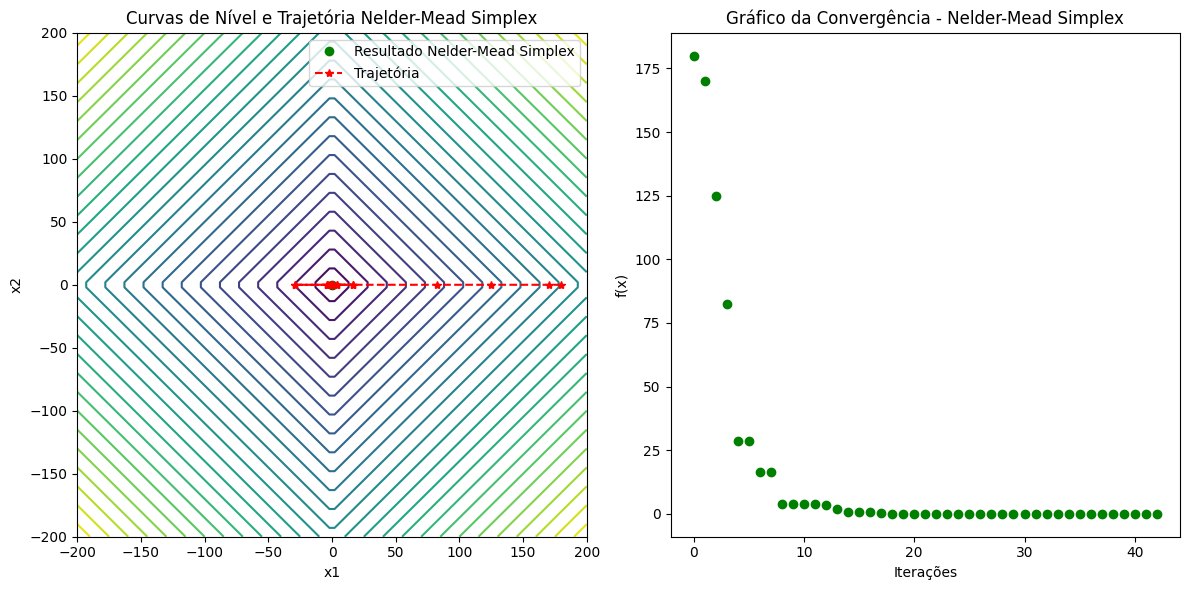

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Inicializar lista para armazenar a trajetória
traj = []

# Função para coletar os valores da função objetivo ao longo das iterações
def collect_values(x):
    traj.append(x.copy())  # Usar copy() para evitar problemas de referência

# Inicializar lista para armazenar os valores da função objetivo ao longo das iterações
values = []

# Método Nelder-Mead Simplex
result_nm = minimize(fx, x0, method='Nelder-Mead', options={'maxiter': 100, 'disp': True}, callback=collect_values)

# Imprimir resultados do Nelder-Mead Simplex
print("Método utilizado: Nelder-Mead Simplex")
print("Número de iterações: {}".format(result_nm.nit))
print("Número de avaliações da função objetivo: {}".format(result_nm.nfev))
print("Resultado final:")
print(result_nm.x)

# Gerar gráficos

# Gráfico da função objetivo e trajetória
plt.figure(figsize=(12, 6))

# Curvas de nível
x1 = np.linspace(-200, 200, 100)
x2 = np.linspace(-200, 200, 100)
x1, x2 = np.meshgrid(x1, x2)
f_values = np.abs(x1) + np.abs(x2)
plt.subplot(1, 2, 1)
plt.contour(x1, x2, f_values, levels=30)
plt.plot(result_nm.x[0], result_nm.x[1], 'go', label='Resultado Nelder-Mead Simplex')
traj = np.array(traj)
plt.plot(traj[:, 0], traj[:, 1], '--*r', label='Trajetória')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de Nível e Trajetória Nelder-Mead Simplex')
plt.legend()

# Gráfico de convergência
plt.subplot(1, 2, 2)
result_nm_values = [fx(x) for x in traj]
plt.plot(result_nm_values, 'go')
plt.title('Gráfico da Convergência - Nelder-Mead Simplex')
plt.xlabel('Iterações')
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()

**Letra C: Resolução Ponto Inicial (0, 10)**

***Método do Gradiente***

Solução ótima: [7.50000062e-04 9.50074996e+00]
Número de iterações: 400
Número de avaliações: 2800


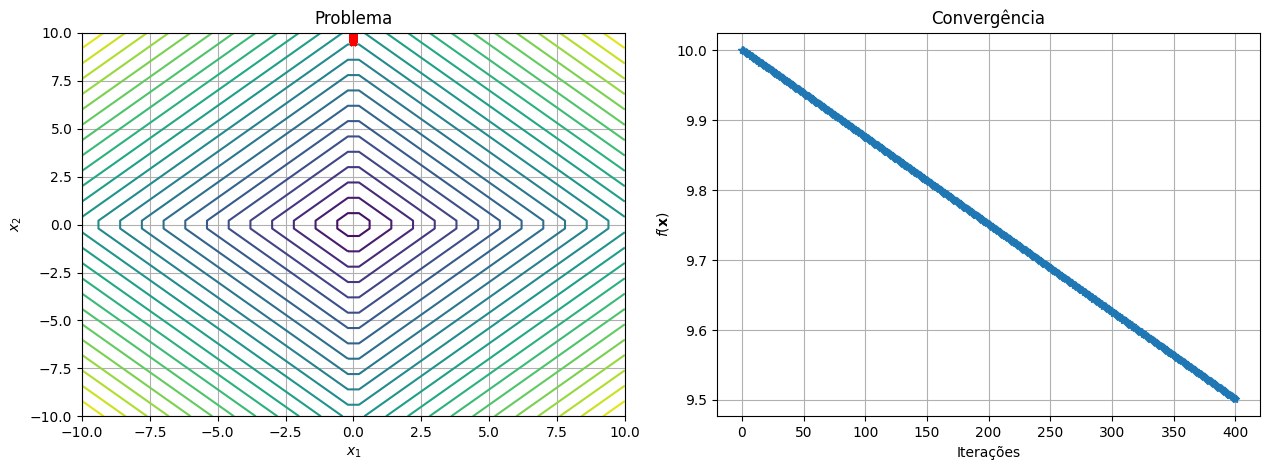

In [6]:
# Ponto inicial
x0 = np.zeros(2) 
x0[0] = 0
x0[1] = 10

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return abs(x1) + abs(x2)
solucao = Gradiente(Bissecao(precisao=1e-2, passo=1e-3), maxit=400,
                    maxaval=3000).resolva(fx, x0)

print(solucao)
solucao.resultados(fx, [-10., 10.], [-10., 10.])

***Método não diferenciável: Simplex***

Optimization terminated successfully.
         Current function value: 0.000922
         Iterations: 36
         Function evaluations: 69
Método utilizado: Nelder-Mead Simplex
Número de iterações: 36
Número de avaliações da função objetivo: 69
Resultado final:
[ 9.06140729e-04 -1.59910414e-05]


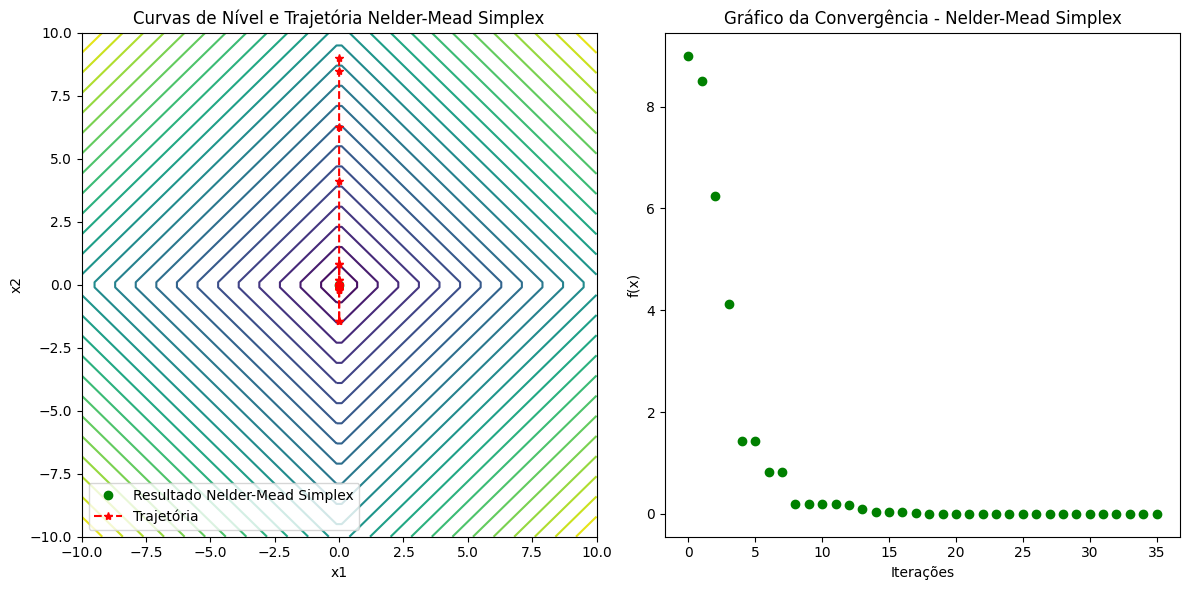

In [7]:
# Inicializar lista para armazenar a trajetória
traj = []

# Função para coletar os valores da função objetivo ao longo das iterações
def collect_values(x):
    traj.append(x.copy())

# Inicializar lista para armazenar os valores da função objetivo ao longo das iterações
values = []

# Método Nelder-Mead Simplex
result_nm = minimize(fx, x0, method='Nelder-Mead', options={'maxiter': 100, 'disp': True}, callback=collect_values)

# Imprimir resultados do Nelder-Mead Simplex
print("Método utilizado: Nelder-Mead Simplex")
print("Número de iterações: {}".format(result_nm.nit))
print("Número de avaliações da função objetivo: {}".format(result_nm.nfev))
print("Resultado final:")
print(result_nm.x)

# Gerar gráficos

# Gráfico da função objetivo e trajetória
plt.figure(figsize=(12, 6))

# Curvas de nível
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
f_values = np.abs(x1) + np.abs(x2)
plt.subplot(1, 2, 1)
plt.contour(x1, x2, f_values, levels=30)
plt.plot(result_nm.x[0], result_nm.x[1], 'go', label='Resultado Nelder-Mead Simplex')
traj = np.array(traj)
plt.plot(traj[:, 0], traj[:, 1], '--*r', label='Trajetória')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de Nível e Trajetória Nelder-Mead Simplex')
plt.legend()

# Gráfico de convergência
plt.subplot(1, 2, 2)
result_nm_values = [fx(x) for x in traj]
plt.plot(result_nm_values, 'go')
plt.title('Gráfico da Convergência - Nelder-Mead Simplex')
plt.xlabel('Iterações')
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()